## Centralized CIFAR10 Results

In [2]:
import json
import numpy as np

seeds = [0,1,2]
depth = 6
small_blocks = 12
dataset = 'CIFAR10'
model_name = 'ViT'

normal_base_paths = [f'saved_models/{dataset}/Centralized{model_name}{depth}_{i}/' for i in seeds]
adaptable_base_paths = [f'saved_models/{dataset}/CentralizedAccordion{model_name}{depth}_{i}/' for i in seeds]
distill_base_paths = [f'saved_models/{dataset}/CentralizedDistillAccordion{model_name}{depth}_{i}/' for i in seeds]
#small_base_paths = [f'saved_models/{dataset}/CentralizedSmallResNet{depth}_{small_blocks}_{i}/' for i in seeds]

normal_accuracies = []
adaptable_accuracies = []
distill_accuracies = []
#small_accuracies = []

with open(normal_base_paths[0] + 'results.json', 'r') as f:
    results_normal = json.load(f)
    model_fractions = results_normal['model_fractions']

for i in seeds:
    with open(normal_base_paths[i] + 'results.json', 'r') as f:
        results_normal = json.load(f)
        normal_accuracies.append(results_normal['accuracies'])

    with open(adaptable_base_paths[i] + 'results.json', 'r') as f:
        results_adaptable = json.load(f)
        adaptable_accuracies.append(results_adaptable['accuracies'])

    with open(distill_base_paths[i] + 'results.json', 'r') as f:
        results_distill = json.load(f)
        distill_accuracies.append(results_distill['accuracies'])
    '''
    with open(small_base_paths[i] + 'results.json', 'r') as f:
        results_small = json.load(f)
        small_accuracies.append(results_small['accuracies'])
    '''
adaptable_accuracies = np.array(adaptable_accuracies)
normal_accuracies = np.array(normal_accuracies)
distill_accuracies = np.array(distill_accuracies)
#small_accuracies = np.array(small_accuracies)

adaptable_accuracy = np.mean(adaptable_accuracies, axis = 0)
normal_accuracy = np.mean(normal_accuracies, axis = 0)
distill_accuracy = np.mean(distill_accuracies, axis = 0)
#small_accuracy = np.mean(small_accuracies, axis = 0)

adaptable_acc_std = np.std(adaptable_accuracies, axis = 0)
normal_acc_std = np.std(normal_accuracies, axis = 0)
distill_acc_std = np.std(distill_accuracies, axis = 0)


In [3]:
adaptable_acc_std, normal_acc_std, distill_acc_std

(array([0.        , 0.1302135 , 0.3586394 , 0.42089851, 0.39600786,
        0.33905096, 0.38125524]),
 array([0.        , 0.90136933, 2.29178242, 0.44582009, 1.25031552,
        1.08346153, 0.43865957]),
 array([0.        , 0.19067133, 0.37744757, 0.36037018, 0.29847762,
        0.23976841, 0.4384062 ]))

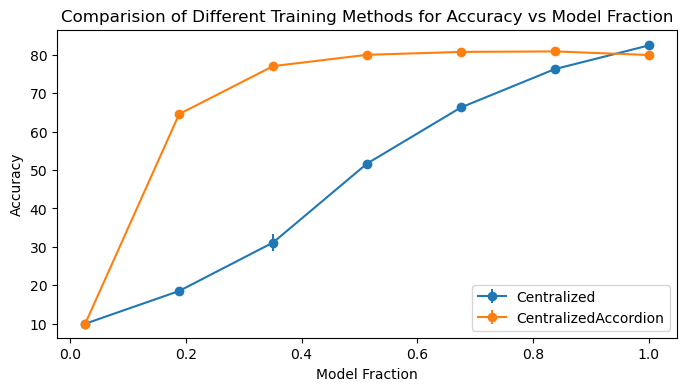

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.errorbar(model_fractions, normal_accuracy, normal_acc_std, linestyle = '-', marker = 'o', label = 'Centralized')
#plt.errorbar(model_fractions, adaptable_accuracy, adaptable_acc_std, linestyle =  '-',  marker = 'o', label = 'CentralizedAccordion')
plt.errorbar(model_fractions, distill_accuracy, distill_acc_std, linestyle = '-',  marker = 'o', label = 'CentralizedAccordion')
#plt.plot(model_fractions, distill_acc_centralized, linestyle = '-',  marker = 'o', label = 'distill_centralized')
#plt.plot(model_fractions, adaptable_acc_centralized, linestyle = '-',  marker = 'o', label = 'adaptable_centralized')
plt.ylabel('Accuracy')
plt.xlabel('Model Fraction')
plt.title("Comparision of Different Training Methods for Accuracy vs Model Fraction")

plt.legend()

In [6]:
normal_accuracy, distill_accuracy, model_fractions

(array([10.        , 18.52      , 31.13      , 51.67333333, 66.28333333,
        76.26666667, 82.42666667]),
 array([10.        , 64.55333333, 77.04      , 79.98      , 80.73666667,
        80.86333333, 79.93      ]),
 [0.026003540069404318,
  0.18833628339117026,
  0.3506690267129362,
  0.5130017700347022,
  0.6753345133564681,
  0.837667256678234,
  1.0])

In [8]:
import exp_utils

normal_val_accuracies = np.array(exp_utils.get_val_accuracies(normal_base_paths, seeds))
adaptable_val_accuracies = np.array(exp_utils.get_val_accuracies(adaptable_base_paths, seeds))
distill_val_accuracies = np.array(exp_utils.get_val_accuracies(distill_base_paths, seeds))
#small_val_accuracies = np.array(exp_utils.get_val_accuracies(small_base_paths, seeds))

adaptable_val_accuracy = np.mean(adaptable_val_accuracies, axis = 0)
normal_val_accuracy = np.mean(normal_val_accuracies, axis = 0)
distill_val_accuracy = np.mean(distill_val_accuracies, axis = 0)
#small_val_accuracy =  np.mean(small_val_accuracies, axis = 0)


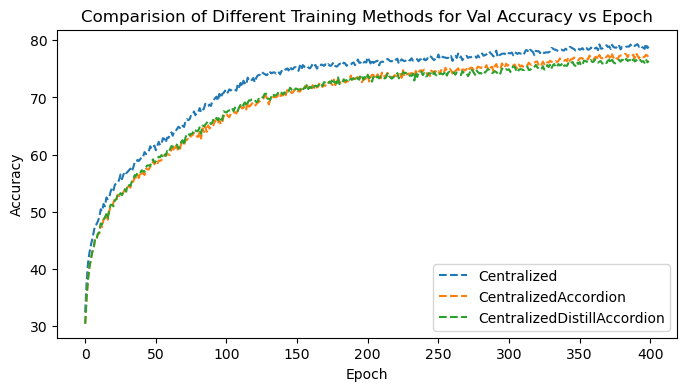

In [9]:
tab = np.arange(len(adaptable_val_accuracy))

plt.figure(figsize=(8,4))
plt.plot(tab, normal_val_accuracy, linestyle = '--', label = 'Centralized')
plt.plot(tab, adaptable_val_accuracy, linestyle =  '--',  label = 'CentralizedAccordion')
plt.plot(tab, distill_val_accuracy, linestyle = '--',  label = 'CentralizedDistillAccordion')
#plt.plot(np.arange(len(small_val_accuracy)), small_val_accuracy, linestyle = '--',  label = 'CentralizedSmall')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Comparision of Different Training Methods for Val Accuracy vs Epoch")

plt.legend()